In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [67]:
data = pd.read_csv("vott-csv-export/test2-export.csv")

In [68]:
data.head()

,image,xmin,ymin,xmax,ymax,label
0,vlcsnap-2019-10-20-14h13m08s668.png,346.312997,151.804245,475.331565,301.238208,Rachel
1,vlcsnap-2019-10-20-14h13m08s668.png,861.255526,195.955189,997.064545,348.785377,Ross
2,vlcsnap-2019-10-20-14h12m54s012.png,737.895668,74.823113,928.028294,262.747642,Monica
3,vlcsnap-2019-10-20-14h12m54s012.png,371.211317,68.030660,595.296198,283.125000,Ross
4,vlcsnap-2019-10-20-14h12m58s782.png,482.122016,150.672170,711.865606,356.709906,Rachel


In [69]:
numClasses = ["Ross","Rachel","Joey","Monica","Pheobe","Chandler"]

In [70]:
u = data.loc[data['label'].isin(numClasses)]

In [71]:
keep_col = ["image","xmin","ymin","xmax","ymax","label"]
new_f = u[keep_col]

In [72]:
new_f['ClassNumber'] = new_f['label']

In [73]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
new_f["ClassNumber"] = lb.fit_transform(new_f["ClassNumber"])

In [74]:
'''
dw = 1./1280
dh = 1./720
print(dw)
print(dh)
'''

'\ndw = 1./1280\ndh = 1./720\nprint(dw)\nprint(dh)\n'

In [75]:
new_f['width'] = (new_f['xmax'] - new_f['xmin'])
new_f['height'] = (new_f['ymax'] - new_f['ymin'])
new_f['x'] = (new_f['xmax'] + new_f['xmin'])/2
new_f['y'] = (new_f['ymax'] + new_f['ymin'])/2
keep_col = ['ClassNumber','image','x','y','width','height']
new_f_2 = new_f[keep_col]

In [76]:
new_f_2.head()

,ClassNumber,image,x,y,width,height
0,4,vlcsnap-2019-10-20-14h13m08s668.png,410.822281,226.521226,129.018568,149.433962
1,5,vlcsnap-2019-10-20-14h13m08s668.png,929.160035,272.370283,135.809019,152.830189
2,2,vlcsnap-2019-10-20-14h12m54s012.png,832.961981,168.785377,190.132626,187.924528
3,5,vlcsnap-2019-10-20-14h12m54s012.png,483.253758,175.577830,224.084881,215.094340
4,4,vlcsnap-2019-10-20-14h12m58s782.png,596.993811,253.691038,229.743590,206.037736


In [83]:
import os
for root, dirs, files in os.walk("vott-csv-export/"):  
	for filename in files:

		if filename.endswith(".jpg"):
			fn = filename[:-4]
			nf = new_f_2.loc[new_f_2['image'] == fn]
			keep_col = ['ClassNumber','x','y','width','height']
			new_nf = nf[keep_col]
			print(new_nf)
			imgpath = "D:\Kaggle_Comp\yolo-od\vott-csv-export" + fn + ".txt"
			print(imgpath)
			new_nf.to_csv(imgpath, index=False, header=False, sep=' ')

In [94]:
keep_col = ['ClassNumber','x','y','width','height']
new_2 = new_f_2[keep_col]
new_2.to_csv("new_csv2.txt",index=False,header=False,sep=" ")

In [58]:
from matplotlib.patches import Rectangle
from matplotlib import patches

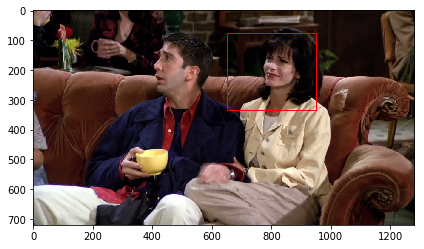

In [63]:
fig,ax = plt.subplots(1)
p = plt.imread("vott-csv-export/vlcsnap-2019-10-20-14h12m54s012.png")
ax.imshow(p)
rect2 = patches.Rectangle(xy=(650,74),width=300,height=261,linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect2)
plt.tight_layout()

In [61]:
img = cv2.imread("vott-csv-export/vlcsnap-2019-10-20-14h12m54s012.png")
spoint = (650,74)
lpoint = (928,262)
color = (255,0,0)
img2 = cv2.rectangle(img,spoint,lpoint,(255,0,0),5)
cv2.imshow("image",img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [42]:
img = cv2.imread("vott-csv-export/vlcsnap-2019-10-20-14h12m54s012.png",cv2.IMREAD_COLOR)